**Кулешов Иван AML-14**

# Задание по теме "Знакомство с временными рядами"
Проанализируйте ряды, сделайте их стационарными:
- “monthly-sales-of-company-x-jan-6.csv”,
- “monthly-boston-armed-robberies-j.csv”,
- “international-airline-passengers.csv”,
- “mean-monthly-air-temperature-deg.csv”,
- “weekly-closings-of-the-dowjones-.csv”,
- "daily-total-female-births-in-cal.csv"

In [80]:
import pandas as pd

In [81]:
sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("daily-total-female-births-in-cal.csv")

# Отображение графиков

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
all_series = {
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

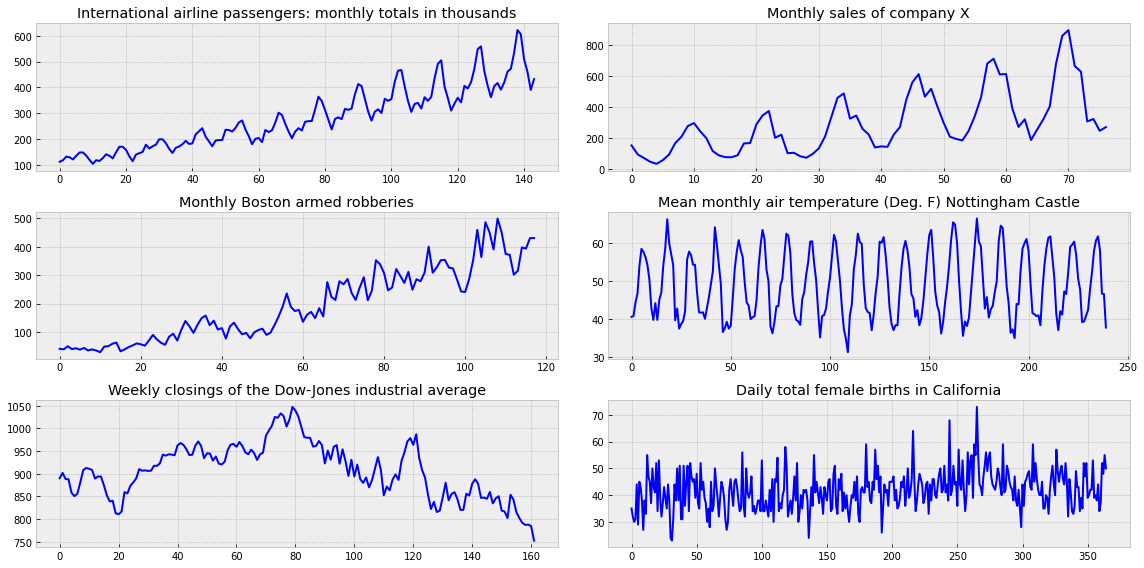

In [84]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

# Функции и библиотеки

In [85]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [86]:
# Тест Дики-Фуллера на стационарность
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [87]:
# Выводит график и коррелограмму
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

# Пример анализа ряда на стационарность

Возьмем ряд International airline passengers и путем преобразований приведём его к стационарному:

In [88]:
series = all_series["International airline passengers: monthly totals in thousands"]

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


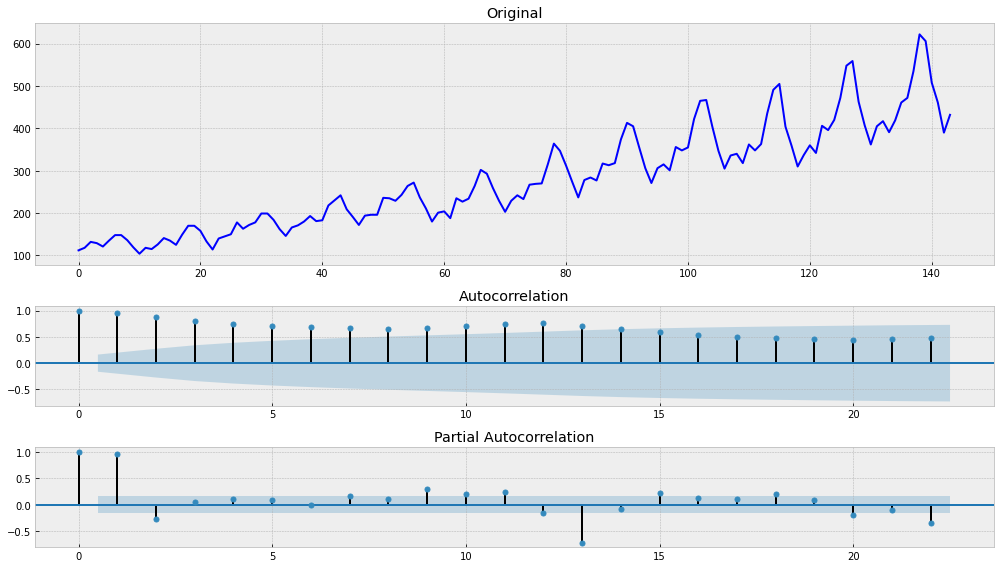

In [89]:
tsplot(series)

Как мы видим, и тест Дики-Фуллера и графики коррелограмм не отвергают гипотезу о нестационарности ряда. Для начала уберем изменение дисперсии при помощи преобразования Бокса-Кокса

In [90]:
series = boxcox(series, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


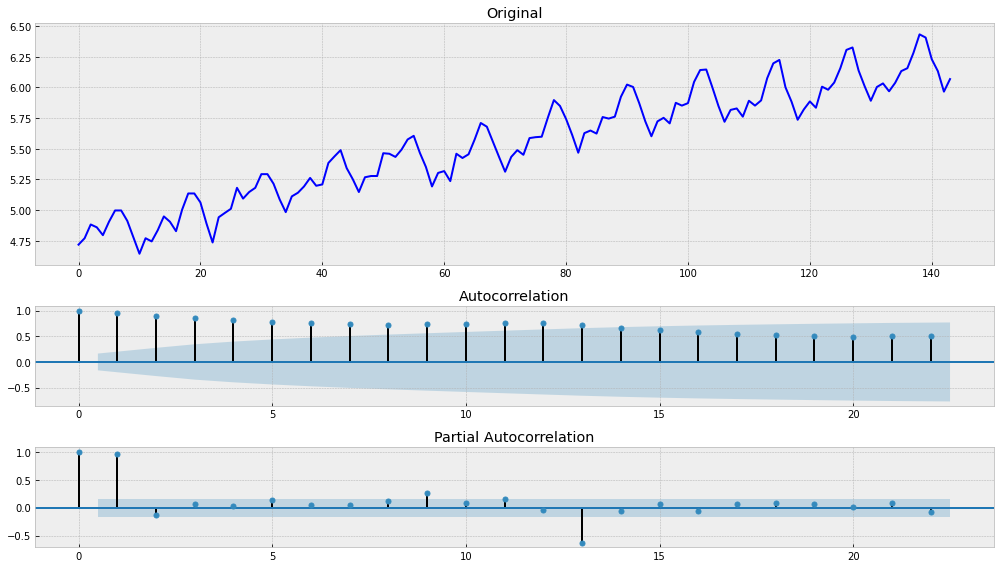

In [91]:
tsplot(series)

Нам удалось убрать размах дисперсии, но тест Дикки-Фуллера все еще не отвергает гипотезу о нестационарности ряда. По графику ряда видно наличие сильного тренда. Уберем его дифференцированием.

In [92]:
series = series[1:] - series[:-1]

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


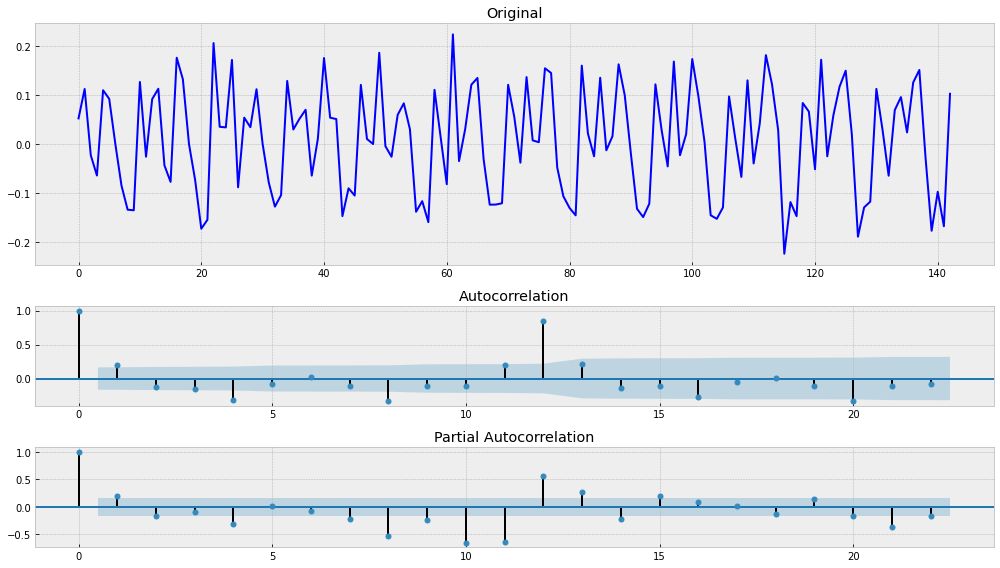

In [93]:
tsplot(series)

Стало еще лучше (p-value = 0.07), но по графику коррелограммы видно сильное влияние сезонности. Уберем ее

In [94]:
series = series[14:] - series[:-14]

Results of Dickey-Fuller Test:
Test Statistic                  -3.730581
p-value                          0.003703
#Lags Used                      13.000000
Number of Observations Used    115.000000
Critical Value (1%)             -3.488535
Critical Value (5%)             -2.887020
Critical Value (10%)            -2.580360
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


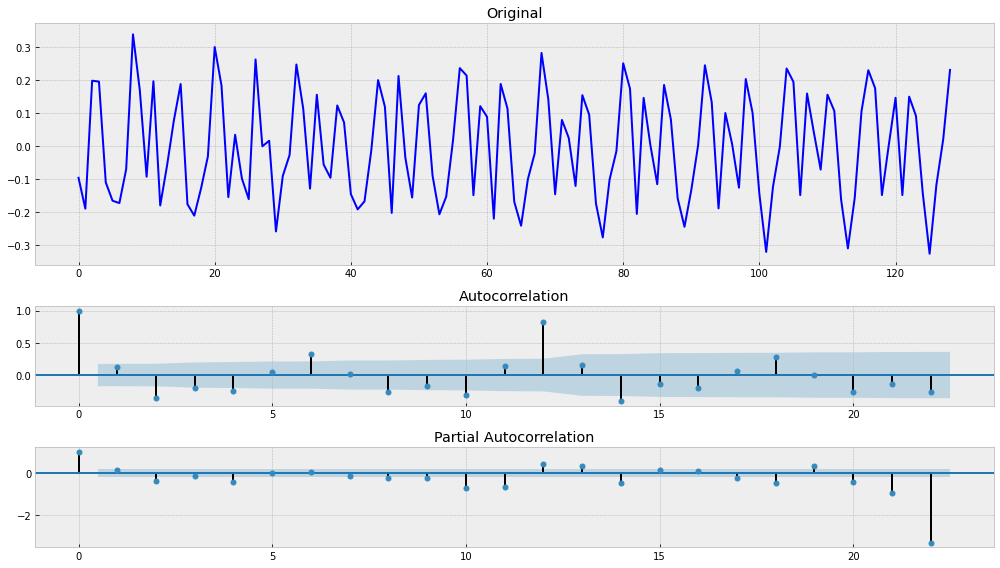

In [95]:
tsplot(series)

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!

# Анализ всех рядов

Проведём анализ остальных рядов по аналогичной схеме.
Модифицируем функцию теста на стационарность таким образом, чтобы она возвращала p_value, и напишем функцию, которая к очередному ряду применит преобразования, и затем выведем график полученного стационарного ряда и список шагов, предпринятых чтобы он получился.——

In [96]:
# Тест Дики-Фуллера на стационарность, возвращает p_value и значение лага
def test_stationarity_pvalue(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    return dftest[1], dftest[2]

In [97]:
# Последовательно проводит тест Дики-Фуллера, при p_value>0.05 проводит очередное преобразование
def timeseries_transform(timeseries):
    p_value, lag = test_stationarity_pvalue(timeseries)

    # Производим преобразования и выводим логи - какие именно
    if p_value <= 0.05:
        print('Тест Дики-Фуллера и графики коррелограмм показывают, что ряд изначально стационарный!')
    else:
        # убираем изменение дисперсии при помощи преобразования Бокса-Кокса
        print('1. Убираем изменение дисперсии при помощи преобразования Бокса-Кокса')
        timeseries = boxcox(timeseries, 0)
        p_value, lag = test_stationarity_pvalue(timeseries)
        
        if p_value > 0.05:
            print('2. Убираем тренд с помощью дифференцирования')
            timeseries = timeseries[1:] - timeseries[:-1]
            p_value, lag = test_stationarity_pvalue(timeseries)

            if p_value > 0.05:
                print('3. Убираем влияние сезонности')
                timeseries = timeseries[lag:] - timeseries[:-lag]
                p_value, lag = test_stationarity_pvalue(timeseries)
                if p_value > 0.05:
                    print('(!) Не удалось привести ряд к стационарному!')
    
    # Выведем график стационарного ряда
    if p_value <= 0.05:
      print('\n')
      tsplot(timeseries)

Приведем к стационарному виду каждый ряд по очереди:

****************************************************************************************************
Исследуется ряд:
 Monthly sales of company X
****************************************************************************************************
1. Убираем изменение дисперсии при помощи преобразования Бокса-Кокса
2. Убираем тренд с помощью дифференцирования


Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


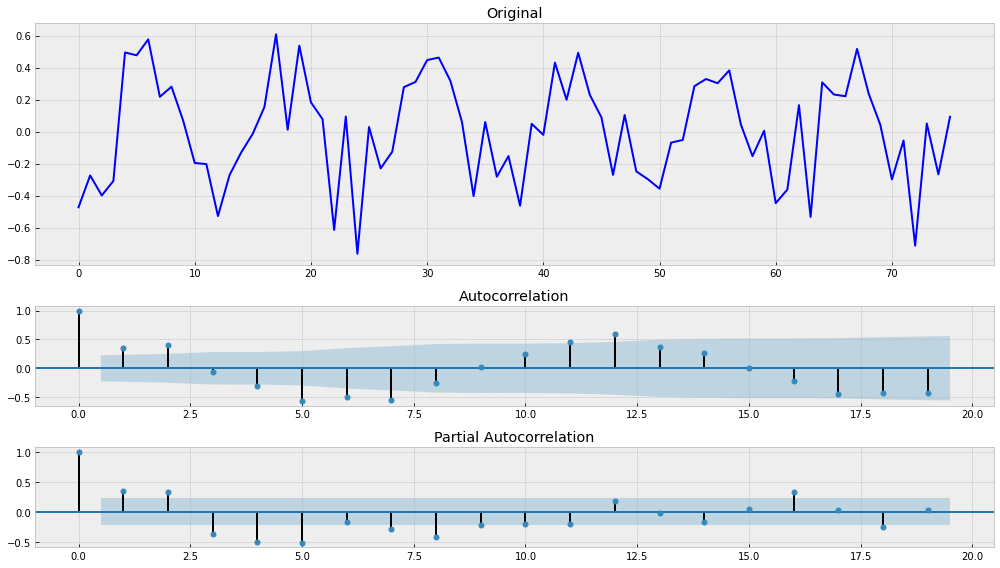

In [98]:
print('*'*100)
print('Исследуется ряд:\n', 'Monthly sales of company X')
print('*'*100)
timeseries_transform(all_series['Monthly sales of company X'])

****************************************************************************************************
Исследуется ряд:
 Monthly Boston armed robberies
****************************************************************************************************
1. Убираем изменение дисперсии при помощи преобразования Бокса-Кокса
2. Убираем тренд с помощью дифференцирования


Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


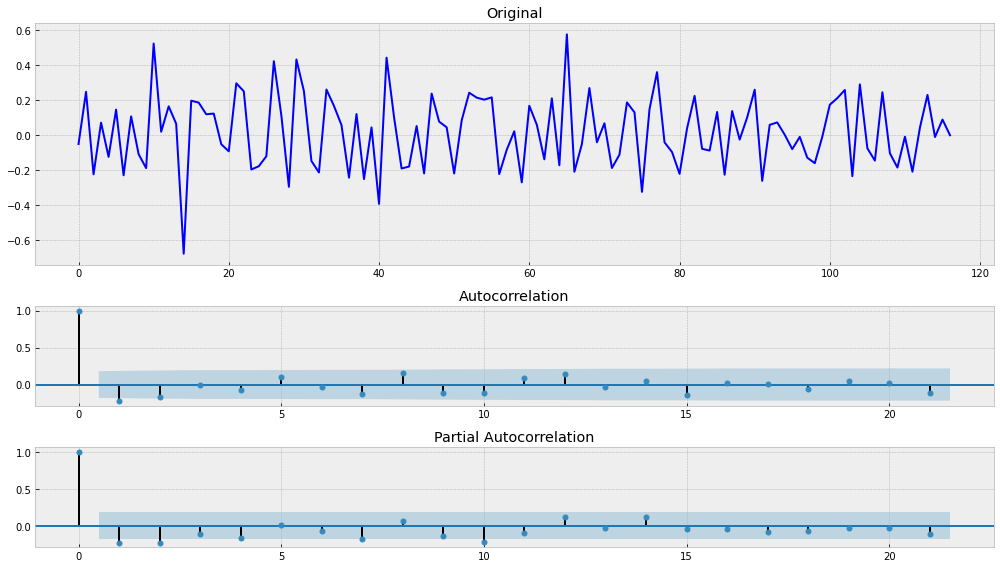

In [99]:
print('*'*100)
print('Исследуется ряд:\n', 'Monthly Boston armed robberies')
print('*'*100)
timeseries_transform(all_series['Monthly Boston armed robberies'])

****************************************************************************************************
Исследуется ряд:
 Mean monthly air temperature (Deg. F) Nottingham Castle
****************************************************************************************************
Тест Дики-Фуллера и графики коррелограмм показывают, что ряд изначально стационарный!


Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


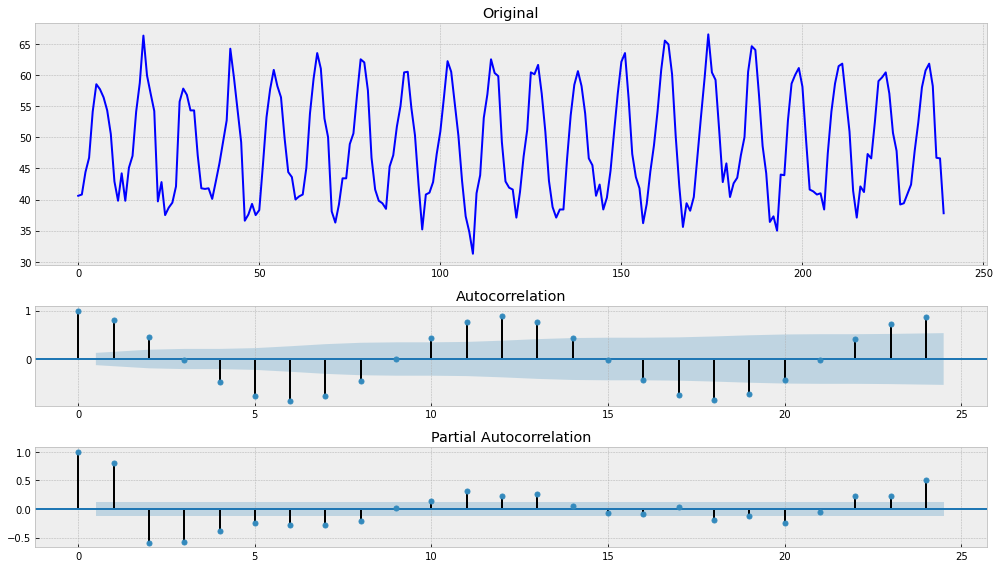

In [100]:
print('*'*100)
print('Исследуется ряд:\n', 'Mean monthly air temperature (Deg. F) Nottingham Castle')
print('*'*100)
timeseries_transform(all_series['Mean monthly air temperature (Deg. F) Nottingham Castle'])

****************************************************************************************************
Исследуется ряд:
 Weekly closings of the Dow-Jones industrial average
****************************************************************************************************
1. Убираем изменение дисперсии при помощи преобразования Бокса-Кокса
2. Убираем тренд с помощью дифференцирования


Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


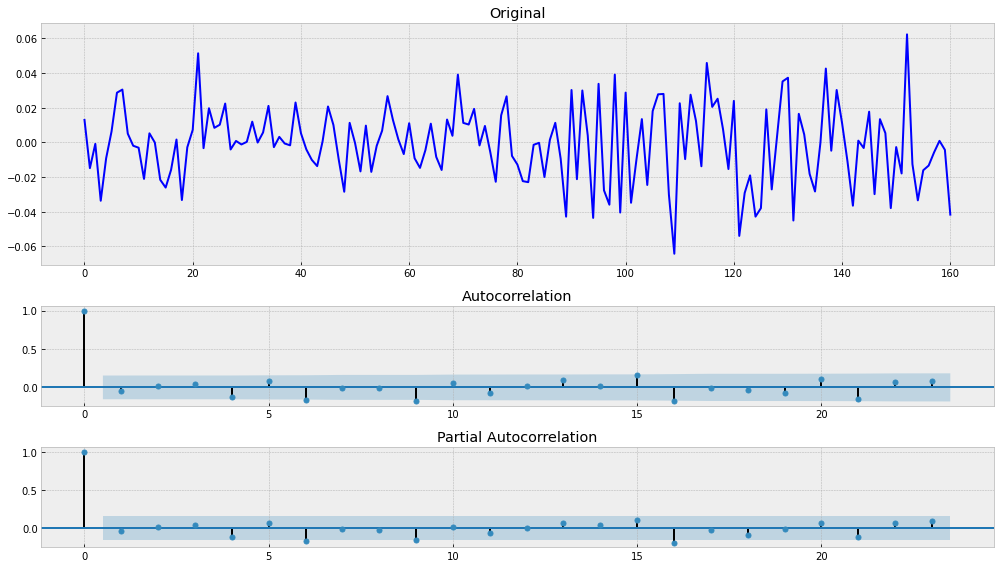

In [101]:
print('*'*100)
print('Исследуется ряд:\n', 'Weekly closings of the Dow-Jones industrial average')
print('*'*100)
timeseries_transform(all_series['Weekly closings of the Dow-Jones industrial average'])

****************************************************************************************************
Исследуется ряд:
 Daily total female births in California
****************************************************************************************************
Тест Дики-Фуллера и графики коррелограмм показывают, что ряд изначально стационарный!


Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


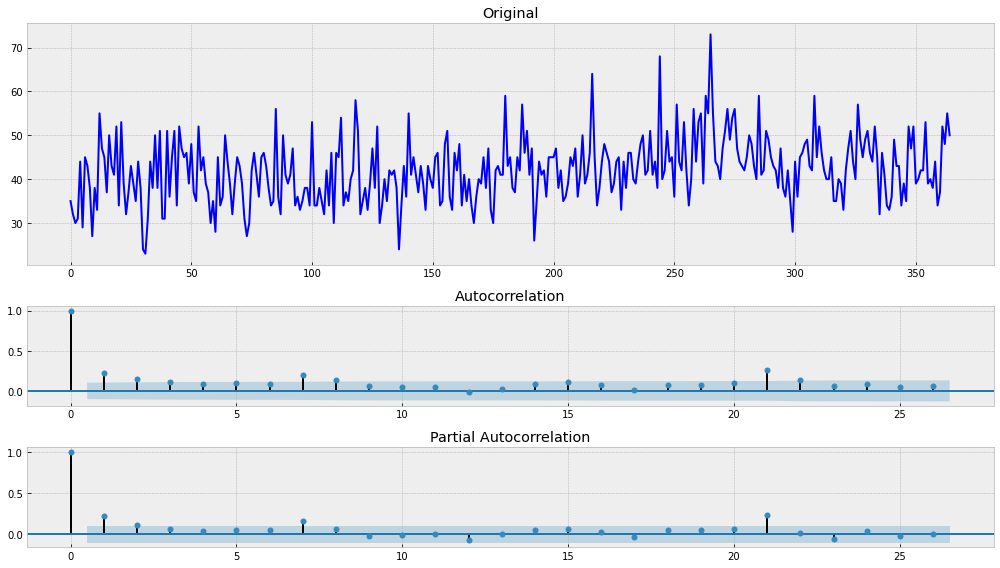

In [102]:
print('*'*100)
print('Исследуется ряд:\n', 'Daily total female births in California')
print('*'*100)
timeseries_transform(all_series['Daily total female births in California'])